<a href="https://colab.research.google.com/github/SaraswataRoy/Cancer-Patient-Sentiment-Analysis/blob/main/CancerSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [55]:
df = pd.read_csv('Mental Health Dataset.csv')
df.head()

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [56]:
df.shape

(10392, 3)

# New section

In [57]:
df.isnull().sum()

posts        1
predicted    0
intensity    0
dtype: int64

In [58]:
df = df.dropna()
df.isnull().sum()

posts        0
predicted    0
intensity    0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10391 entries, 0 to 10391
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   posts      10391 non-null  object
 1   predicted  10391 non-null  object
 2   intensity  10391 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 324.7+ KB


In [60]:
df.nunique()

posts        10391
predicted        4
intensity        4
dtype: int64

In [61]:
df['predicted'].unique()

array(['negative', 'neutral', 'positive', 'very negative'], dtype=object)

In [62]:
df['predicted'].value_counts()

predicted
neutral          4374
negative         4112
very negative    1155
positive          750
Name: count, dtype: int64

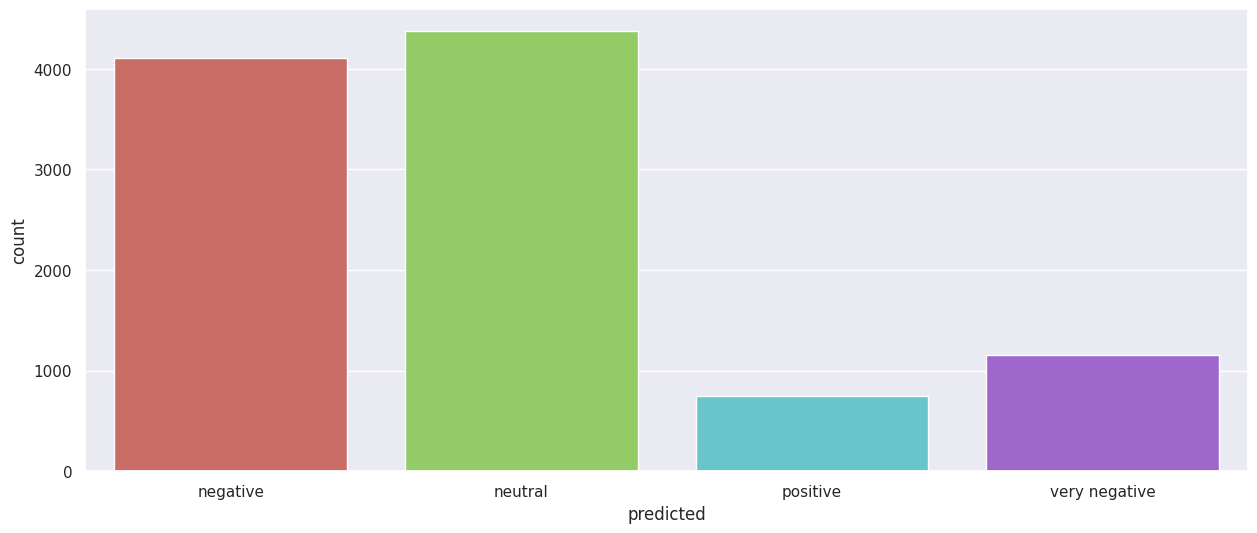

In [63]:
plt.figure(figsize=(15,6))
sns.countplot(x = df['predicted'], data=df, palette='hls')
plt.show()

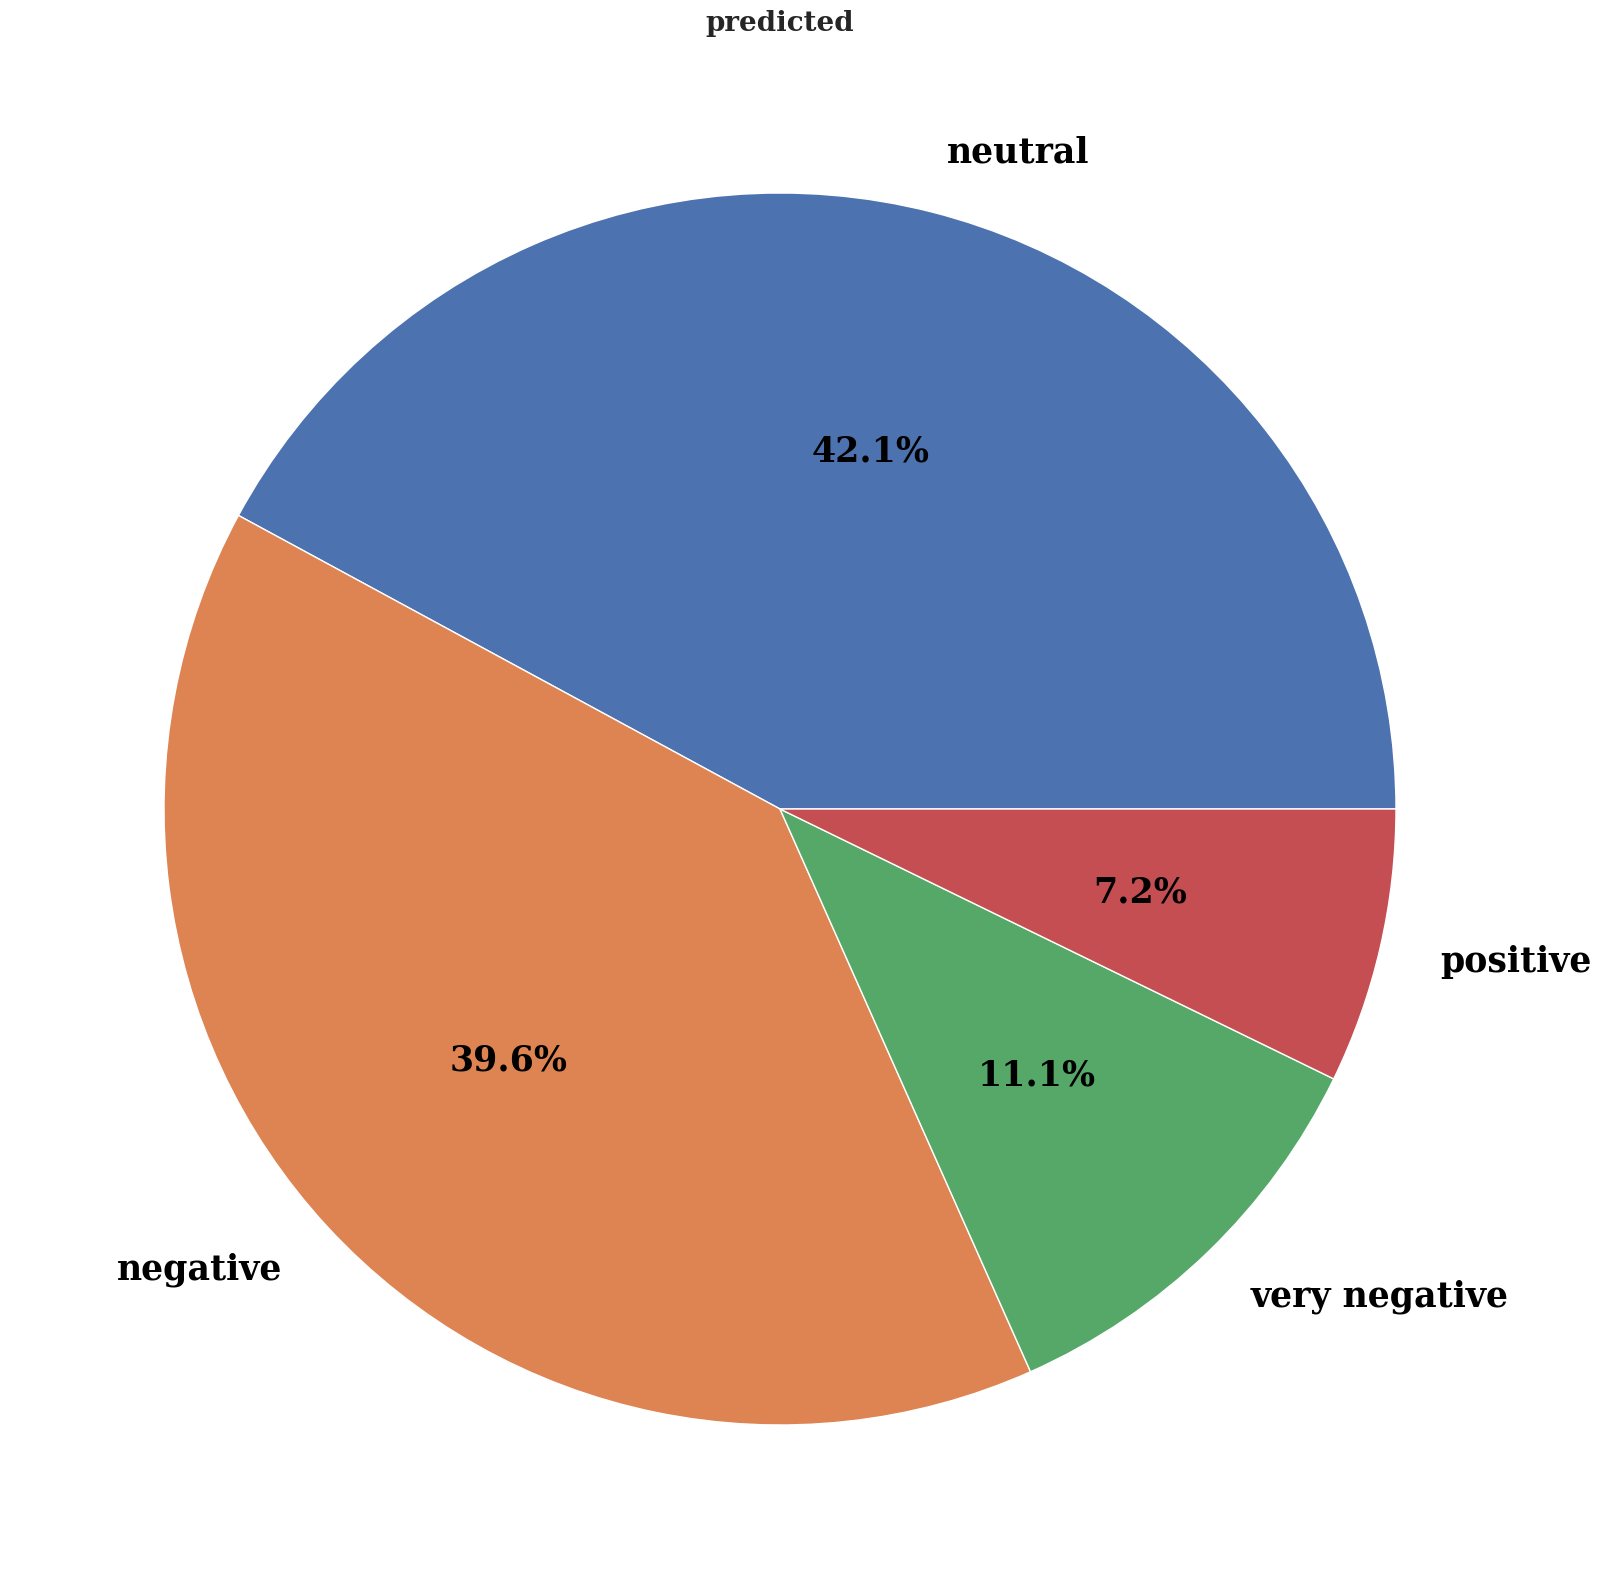

In [64]:
plt.figure(figsize=(30,20))
plt.pie(df['predicted'].value_counts(), labels=df['predicted'].value_counts().index,
       autopct='%1.1f%%', textprops={'fontsize':25, 'color':'black','weight':'bold',
                                    'family':'serif'})
hfont = {'fontname':'serif', 'weight':'bold'}
plt.title('predicted', size=20, **hfont)
plt.show()

In [65]:
df_new = df.copy()

In [66]:
def clean_text(text):
    text = text.lower()
    return text.strip()

In [67]:
# df_new['posts'] = df_new['posts'].apply(lambda x: clean_text(x))

In [68]:
import string
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [69]:
# df_new['posts'] = df_new['posts'].apply(lambda x: remove_punctuation(x))

In [70]:
import re

def tokenization(text):
    tokens = re.split('W+', text)
    return tokens

In [71]:
# df_new['posts'] = df_new['posts'].apply(lambda x: tokenization(x))

In [72]:
import nltk

In [73]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [75]:
def remove_Stopwords(text):
    output = " ".join(word for word in text.split() if word.lower() not in stopwords)
    return output

In [76]:
# df_new['posts'] = df_new['posts'].apply(lambda x: remove_Stopwords(x))

In [77]:
from nltk.stem import WordNetLemmatizer

In [78]:
wordnet_lemmatizer = WordNetLemmatizer()

In [79]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [80]:
def lemmatizer(text):
    lemm_text = " ".join(wordnet_lemmatizer.lemmatize(word) for word in text.split())
    return lemm_text

In [81]:
# df_new['posts'] = df_new['posts'].apply(lambda x: lemmatizer(x))

In [82]:
def remove_digits(text):
    clean_text = re.sub('[^a-z]+'," ", text)
    return clean_text

In [83]:
# df_new['posts'] = df_new['posts'].apply(lambda x: remove_digits(x))

In [84]:
df_new['posts']

0        I know as parent of child with down syndrome t...
1        but in my heart I know this is the future prom...
2        I have mylefibrosis which turn to leukemia the...
3        from one of my health group subject wayne dyer...
4        gmos now link to leukemia http nsnbc I 2013 07...
                               ...                        
10387    hey everyone I am a 25 year old male I work ou...
10388    have surgery for stage 1 colon cancer 1 year a...
10389    the doctor advise we he could not remove the a...
10390    my 66 year old father have been through so muc...
10391    I have bein have a bloody stool since last yea...
Name: posts, Length: 10391, dtype: object

In [85]:
df1 = df_new[['predicted','posts']]

In [86]:
df1['posts'].values

array(['I know as parent of child with down syndrome that you have all hear that our child are at a high risk of leukemia as parent we read up on it and then say well that will not happen to my child well when will have just turn 2yr old he start bruise the thought of leukemia breafly cross my mind but I quickly push it out of my mind and rationalize it by say that he was a rough playing 2yr old and it was normal to bruise now and then I have just go to work a few month before and will have get a little more fussy and whinny but that is normal to right well then he get sick and like a lot of child with down when he get sick he get sick so we take he to the doc on a friday they say he have a cold and I tell my boss that he was sick and not to be surpise if I call and say he was in the hospital because they offten have to do that when he get sick she say ok and when sit get there sure enough he was much sicker and we take he to the er they tell we he have rsv and send we home with some m

In [87]:
!pip install contractions

In [89]:
# Checks if formula is applied to the entire dataset
from tqdm import tqdm
# I'm --> I am
import contractions
# to decipher html format
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
import re
import nltk
wordnet = WordNetLemmatizer()
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

prepocessed_posts = []

for sentence in tqdm(df1['posts'].values):
  sentencee = contractions.fix(sentence)
  sentence = BeautifulSoup(sentence, 'lxml').get_text()
  sentence = re.sub(r"https\S+", "", sentence)
  sentence = re.sub("\S*\d\S*","", sentence).strip()
  sentence = re.sub('[^a-zA-Z\s]+', " ", sentence)
  tokens = sentence.split()
  tokens = [wordnet.lemmatize(word) for word in tokens if word.lower() not in stopwords]
  cleaned_sentence = ' '.join(tokens).lower()
  prepocessed_posts.append(cleaned_sentence.strip())
# print(len(prepocessed_posts))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 10391/10391 [00:30<00:00, 343.84it/s]


**Feature** **Engineering**

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [96]:
# Instead of BOW we used TFIDF as the number of data in huge

tf_idf_vect = TfidfVectorizer()
tf_idf_vect.fit(prepocessed_posts)
# print(f"Feature names: {tf_idf_vect.get_feature_names_out()[0:50]}")
# final_counts_tfidf = tf_idf_vect.transform(prepocessed_posts)
# print(f"Count vectorizer: type(final_counts_tfidf)")

TfidfVectorizer()

In [92]:
# final_counts_tfidf.shape

(10391, 35002)

In [93]:
final_counts_tfidf = tf_idf_vect.transform(prepocessed_posts).toarray()

In [95]:
pd.DataFrame(final_counts_tfidf).head()

,0,1,2,3,4,5,6,7,8,9,...,34992,34993,34994,34995,34996,34997,34998,34999,35000,35001
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
y = df1['predicted']
x = final_counts_tfidf

In [103]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y_label = label.fit_transform(y)

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_label, test_size = 0.2, random_state=45, stratify=y)

In [107]:
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [108]:
y_pred_train = xgboost.predict(x_train)
y_pred_test = xgboost.predict(x_test)

In [109]:
from sklearn.metrics import classification_report, accuracy_score
print("Training Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))

Training Accuracy:  0.9789461020211742
Test Accuracy:  0.721019721019721
